In [2]:
import numpy as np 
import json

# Replace with the actual path to your JSON file
with open("./Annual_Returns/annualized_returns-u1-5.json", "r") as f:
  data1 = json.load(f)
  
with open("./Annual_Returns/annualized_returns-u2-5.json", "r") as f:
  data2 = json.load(f)
  
with open("./Annual_Returns/annualized_returns-u2bad-5.json", "r") as f:
  data2_bad = json.load(f)

with open("./Annual_Returns/annualized_returns-u2etf-5.json", "r") as f:
  data2_etf = json.load(f)
  
with open("./Annual_Returns/annualized_returns-u2etf-5-bad.json", "r") as f:
  data2_etf_bad = json.load(f)

# Assuming the data is stored in a list called "values" within the JSON
return_values1 = data1
return_values2 = data2
return_values2_bad = data2_bad
return_values2_etf = data2_etf
return_values2_etf_bad = data2_etf_bad
# Convert strings to floats if needed
return_values1 = [float(x) for x in return_values1]
return_values2 = [float(x) for x in return_values2]
return_values2_bad = [float(x) for x in return_values2_bad]
return_values2_etf = [float(x) for x in return_values2_etf]
return_values2_etf_bad = [float(x) for x in return_values2_etf_bad]
# Calculate mean
mean1 = sum(return_values1) / len(return_values1)
print(f"Filter 1 mean: {mean1}")
mean2 = sum(return_values2) / len(return_values2)
print(f"Filter 2 mean: {mean2}")
mean2_bad = sum(return_values2_bad) / len(return_values2_bad)
print(f"Filter 2 bad mean: {mean2_bad}")
mean2_etf = sum(return_values2_etf) / len(return_values2_etf)
print(f"Filter 2 etf mean: {mean2_etf}")
mean2_etf_bad = sum(return_values2_etf_bad) / len(return_values2_etf_bad)
print(f"Filter 2 etf bad mean: {mean2_etf_bad}")
# Calculate standard deviation
std_dev1 = np.std(return_values1)
print(f"Filter 1 standard deviation: {std_dev1}")
std_dev2 = np.std(return_values2)
print(f"Filter 2 standard deviation: {std_dev2}")
std_dev2_bad = np.std(return_values2_bad)
print(f"Filter 2 bad standard deviation: {std_dev2_bad}")
std_dev2_etf = np.std(return_values2_etf)
print(f"Filter 2 etf standard deviation: {std_dev2_etf}")
std_dev2_etf_bad = np.std(return_values2_etf_bad)
print(f"Filter 2 etf bad standard deviation: {std_dev2_etf_bad}")

Filter 1 mean: 10.177886533415045
Filter 2 mean: 9.661775214813792
Filter 2 bad mean: 10.99585530503809
Filter 2 etf mean: 9.200983934615591
Filter 2 etf bad mean: 10.711753115361438
Filter 1 standard deviation: 0.8220844470666449
Filter 2 standard deviation: 0.7941646423126831
Filter 2 bad standard deviation: 0.750579465255356
Filter 2 etf standard deviation: 0.7431387630907155
Filter 2 etf bad standard deviation: 0.7059164918281655


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x-axis range (adjust based on your data and desired spread)
x1 = np.arange(mean1 - 3 * std_dev1, mean1 + 3 * std_dev1, 0.1)
x2 = np.arange(mean2 - 3 * std_dev2, mean2 + 3 * std_dev2, 0.1)
x2_bad = np.arange(mean2_bad - 3 * std_dev2_bad, mean2_bad + 3 * std_dev2_bad, 0.1)
x2_etf = np.arange(mean2_etf - 3 * std_dev2_etf, mean2_etf + 3 * std_dev2_etf, 0.1)
x2_etf_bad = np.arange(mean2_etf_bad - 3 * std_dev2_etf_bad, mean2_etf_bad + 3 * std_dev2_etf_bad, 0.1)

# Calculate y-values for the normal distribution
y1 = 1 / (std_dev1 * np.sqrt(2 * np.pi)) * np.exp(- (x1 - mean1) ** 2 / (2 * std_dev1 ** 2))
y2 = 1 / (std_dev2 * np.sqrt(2 * np.pi)) * np.exp(- (x2 - mean2) ** 2 / (2 * std_dev2 ** 2))
y2_bad = 1 / (std_dev2_bad * np.sqrt(2 * np.pi)) * np.exp(- (x2_bad - mean2_bad) ** 2 / (2 * std_dev2_bad ** 2))
y2_etf = 1 / (std_dev2_etf * np.sqrt(2 * np.pi)) * np.exp(- (x2_etf - mean2_etf) ** 2 / (2 * std_dev2_etf ** 2))
y2_etf_bad = 1 / (std_dev2_etf_bad * np.sqrt(2 * np.pi)) * np.exp(- (x2_etf_bad - mean2_etf_bad) ** 2 / (2 * std_dev2_etf_bad ** 2))


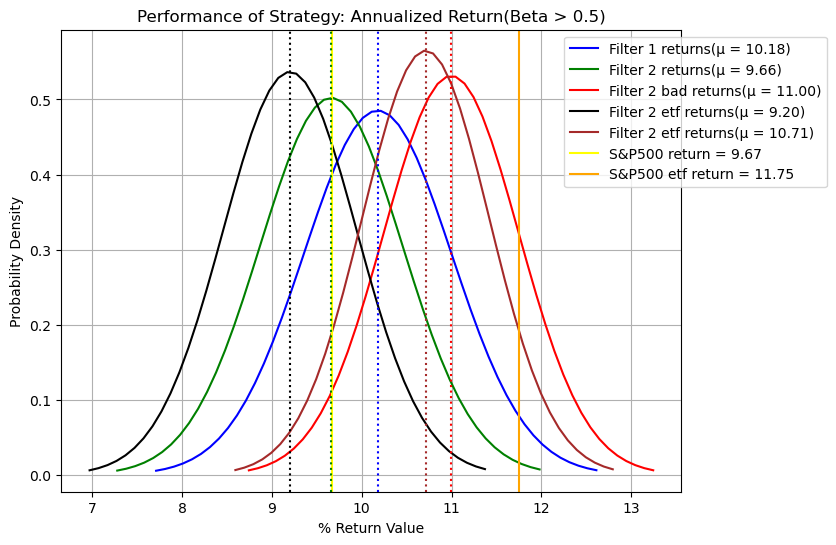

In [6]:
# Create the plot
plt.figure(figsize=(8, 6))

# Plot the bell curve
plt.plot(x1, y1, label="Filter 1 returns(μ = {:.2f})".format(mean1), color='blue')
plt.plot(x2, y2, label="Filter 2 returns(μ = {:.2f})".format(mean2),  color='green')
plt.plot(x2_bad, y2_bad, label="Filter 2 bad returns(μ = {:.2f})".format(mean2_bad),  color='red')
plt.plot(x2_etf, y2_etf, label="Filter 2 etf returns(μ = {:.2f})".format(mean2_etf),  color='black')
plt.plot(x2_etf_bad, y2_etf_bad, label="Filter 2 etf returns(μ = {:.2f})".format(mean2_etf_bad),  color='brown')



# Plot the vertical line at x = 9.67
plt.axvline(x=9.67, color='yellow', linestyle='-', label="S&P500 return = 9.67")
plt.axvline(x=11.75, color='orange', linestyle='-', label="S&P500 etf return = 11.75")
# Mark the mean value on the curve
plt.axvline(x=mean1, color='blue', linestyle='dotted')
plt.axvline(x=mean2, color='green',linestyle = "dotted")
plt.axvline(x=mean2_bad, color='red',linestyle = "dotted")
plt.axvline(x=mean2_etf, color='black',linestyle = "dotted")
plt.axvline(x=mean2_etf_bad, color='brown',linestyle = "dotted")


# Add labels and title
plt.xlabel("% Return Value")
plt.ylabel("Probability Density")
plt.title("Performance of Strategy: Annualized Return(Beta > 0.5)")

# Customize the plot (optional)
plt.grid(True)
plt.legend()

if plt.legend():
  legend = plt.legend()
  legend.set_bbox_to_anchor((0.8, 1))
# Show the plot
plt.show()

In [35]:
sharpe_ratio = []
for returns in return_values1:    
    sharpe_ratio.append(round(((returns/100)) / std_dev1, 2))
sharpe_ratio

[0.13,
 0.11,
 0.12,
 0.14,
 0.11,
 0.13,
 0.12,
 0.13,
 0.13,
 0.12,
 0.12,
 0.12,
 0.13,
 0.13,
 0.12,
 0.14,
 0.12,
 0.13,
 0.12,
 0.16,
 0.11,
 0.13,
 0.12,
 0.13,
 0.14,
 0.12,
 0.12,
 0.12,
 0.12,
 0.12,
 0.13,
 0.11,
 0.13,
 0.11,
 0.12,
 0.11,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.14,
 0.15,
 0.13,
 0.13,
 0.12,
 0.12,
 0.14,
 0.11,
 0.14,
 0.11,
 0.13,
 0.13,
 0.13,
 0.11,
 0.14,
 0.13,
 0.12,
 0.13,
 0.12,
 0.13,
 0.13,
 0.14,
 0.12,
 0.12,
 0.12,
 0.14,
 0.13,
 0.11,
 0.13,
 0.12,
 0.12,
 0.11,
 0.12,
 0.13,
 0.12,
 0.14,
 0.12,
 0.14,
 0.13,
 0.12,
 0.13,
 0.12,
 0.12,
 0.14,
 0.12,
 0.11,
 0.14,
 0.12,
 0.12,
 0.13,
 0.13,
 0.14,
 0.12,
 0.13,
 0.15,
 0.1,
 0.12,
 0.14,
 0.13,
 0.12,
 0.11,
 0.12,
 0.13,
 0.12,
 0.11,
 0.13,
 0.14,
 0.12,
 0.14,
 0.13,
 0.12,
 0.12,
 0.11,
 0.12,
 0.13,
 0.14,
 0.13,
 0.13,
 0.13,
 0.12,
 0.13,
 0.14,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.14,
 0.13,
 0.12,
 0.12,
 0.13,
 0.1,
 0.12,
 0.12,
 0.12,
 0.11,
 0.09,
 0.13,
 0.13,
 0.13,
 0.13,
 